In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
stress_csv = pd.read_csv("corporate_stress_dataset.csv")
stress_csv.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [3]:
factors = stress_csv[["Gender","Gender_Bias_Experienced", "Stress_Level", "Family_Support_Level", "Team_Size", "Physical_Activity_Hours_per_Week", "Sleep_Hours", "Remote_Work" ]]
factors = factors.rename(columns={"Gender_Bias_Experienced":"Gender Bias Experienced?", "Stress_Level":"Stress Level 1 - 10", "Family_Support_Level":"Familial Support  Level 1 - 10", "Team_Size":"Team Size", "Physical_Activity_Hours_per_Week":"Physical Activity Hours per Week", "Sleep_Hours": "Sleep Hours per Night", "Remote_Work":"Remote Work?"}) 
inplace=True
factors.head()

,Gender,Gender Bias Experienced?,Stress Level 1 - 10,Familial Support Level 1 - 10,Team Size,Physical Activity Hours per Week,Sleep Hours per Night,Remote Work?
0,Non-Binary,True,0,2,38,1.9,5.6,True
1,Female,True,7,1,72,3.5,9.0,True
2,Female,False,7,1,67,8.4,7.9,False
3,Female,True,6,10,98,6.4,4.1,False
4,Male,False,8,1,85,9.2,4.0,True


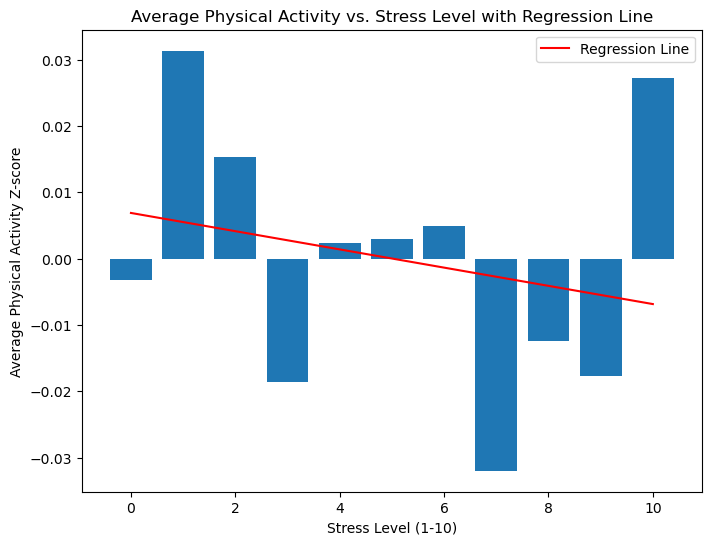

In [ ]:

# Calculate Z-score for Physical Activity
factors["Physical Activity Z-score"] = (factors["Physical Activity Hours per Week"] - factors["Physical Activity Hours per Week"].mean()) / factors["Physical Activity Hours per Week"].std()

# Group by Stress Level and calculate the average Physical Activity Z-score
avg_activity = factors.groupby("Stress Level 1 - 10")["Physical Activity Z-score"].mean()

# Create Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(avg_activity.index, avg_activity.values)

# Add Regression Line
x_vals = avg_activity.index
y_vals = avg_activity.values
m, b = np.polyfit(x_vals, y_vals, 1) 

# Plot the regression line
plt.plot(x_vals, m*x_vals + b, color='red', label='Regression Line')

# Labels and title
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Average Physical Activity Z-score")
plt.title("Average Physical Activity vs. Stress Level with Regression Line")

# Show plot
plt.legend()
plt.show()



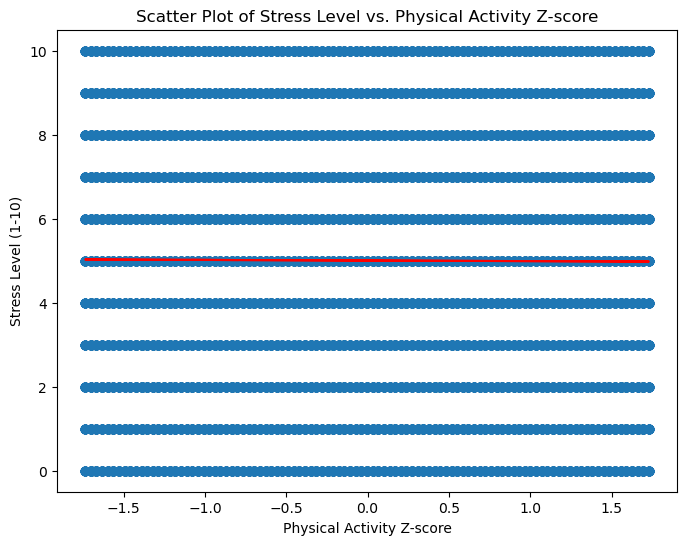

In [30]:

# Calculate Z-score for Physical Activity
factors["Physical Activity Z-score"] = (factors["Physical Activity Hours per Week"] - factors["Physical Activity Hours per Week"].mean()) / factors["Physical Activity Hours per Week"].std()

# Now you can visualize the relationship between Stress Level and the Z-score of Physical Activity
plt.figure(figsize=(8, 6))
plt.scatter(factors["Physical Activity Z-score"], factors["Stress Level 1 - 10"])

# Regression line
m, b = np.polyfit(factors["Physical Activity Z-score"], factors["Stress Level 1 - 10"], 1)
plt.plot(factors["Physical Activity Z-score"], m*factors["Physical Activity Z-score"] + b, color='red')

plt.xlabel("Physical Activity Z-score")
plt.ylabel("Stress Level (1-10)")
plt.title("Scatter Plot of Stress Level vs. Physical Activity Z-score")
plt.show()


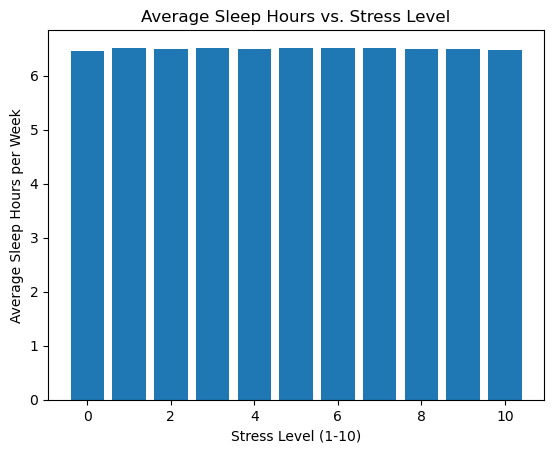

In [19]:
# Group by Stress Level and calculate the average Physical Activity Hours
avg_sleep = factors.groupby("Stress Level 1 - 10")["Sleep Hours per Night"].mean()

# Create Bar Chart
plt.bar(avg_sleep.index, avg_sleep.values)

# Labels and title
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Average Sleep Hours per Week")
plt.title("Average Sleep Hours vs. Stress Level")

# Show plot
plt.show()